# PyTorch quick revision from the official tutorials for tensorflow people

In [1]:
import torch

In [2]:
## We do things like we would have done in numpy i.e lot of manual calculation
x = torch.empty(5,3)
print(x)

## yay an empty 5 x 3 matrix or a tensor as they call it

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


In [3]:
## Getting random variables range 0 , 1
x = torch.rand(5,3)
print(x)

## and many more exist like this

tensor([[0.3880, 0.8199, 0.2898],
        [0.6449, 0.5578, 0.1688],
        [0.2335, 0.7963, 0.8927],
        [0.2032, 0.4299, 0.2409],
        [0.6283, 0.1152, 0.4861]])


In [4]:
x = torch.tensor([4,5,6]) ## This is a tensor
print(x)
print(x.size()) ## this is a tupple so supports tupple operation
## TO BE NOTED ALL THE NORMAL NUMPY OPPS ARE SUPPORTED HERE

tensor([4, 5, 6])
torch.Size([3])


In [5]:
x = torch.rand((3,4,5))
print(x.view((12,5))) ## This is how reshape tensors by view opp cool

tensor([[0.6338, 0.9851, 0.0262, 0.1332, 0.0523],
        [0.7835, 0.9359, 0.4455, 0.3878, 0.5530],
        [0.0714, 0.0435, 0.9916, 0.5912, 0.4978],
        [0.3708, 0.5061, 0.1259, 0.2301, 0.2187],
        [0.1493, 0.2586, 0.6372, 0.3214, 0.7729],
        [0.5047, 0.0031, 0.7603, 0.5704, 0.4037],
        [0.9949, 0.7993, 0.1529, 0.6301, 0.2469],
        [0.6789, 0.4863, 0.9660, 0.5266, 0.2509],
        [0.6879, 0.4490, 0.4139, 0.5726, 0.8976],
        [0.2292, 0.6735, 0.6236, 0.9390, 0.0746],
        [0.2812, 0.8519, 0.9704, 0.0922, 0.1541],
        [0.4538, 0.0789, 0.3859, 0.7943, 0.2468]])


In [6]:
## Lets check whether CUDA IS AVAILABLE OR NOT
## In my case it is. It's a mx150 mobile gpu
if torch.cuda.is_available():
    device = torch.device('cuda')

In [7]:
y_cuda = torch.rand((5,3) , device = device)

In [8]:
x_cuda = x.to(device) ## or we can move variable to the device and get a refference for it

In [9]:
print(x , x_cuda)
## The output is pretty self evident duh ???

tensor([[[0.6338, 0.9851, 0.0262, 0.1332, 0.0523],
         [0.7835, 0.9359, 0.4455, 0.3878, 0.5530],
         [0.0714, 0.0435, 0.9916, 0.5912, 0.4978],
         [0.3708, 0.5061, 0.1259, 0.2301, 0.2187]],

        [[0.1493, 0.2586, 0.6372, 0.3214, 0.7729],
         [0.5047, 0.0031, 0.7603, 0.5704, 0.4037],
         [0.9949, 0.7993, 0.1529, 0.6301, 0.2469],
         [0.6789, 0.4863, 0.9660, 0.5266, 0.2509]],

        [[0.6879, 0.4490, 0.4139, 0.5726, 0.8976],
         [0.2292, 0.6735, 0.6236, 0.9390, 0.0746],
         [0.2812, 0.8519, 0.9704, 0.0922, 0.1541],
         [0.4538, 0.0789, 0.3859, 0.7943, 0.2468]]]) tensor([[[0.6338, 0.9851, 0.0262, 0.1332, 0.0523],
         [0.7835, 0.9359, 0.4455, 0.3878, 0.5530],
         [0.0714, 0.0435, 0.9916, 0.5912, 0.4978],
         [0.3708, 0.5061, 0.1259, 0.2301, 0.2187]],

        [[0.1493, 0.2586, 0.6372, 0.3214, 0.7729],
         [0.5047, 0.0031, 0.7603, 0.5704, 0.4037],
         [0.9949, 0.7993, 0.1529, 0.6301, 0.2469],
         [0.6789, 0.486

But this is not why we use pytorch we need it for its Automatic Differentiation capability for opperations on tensor i.e AutoGrad.

This is an excerpt from the official docs

torch.Tensor is the central class of the package. If you set its attribute .requires_grad as True, it starts to track all operations on it. When you finish your computation you can call .backward() and have all the gradients computed automatically. The gradient for this tensor will be accumulated into .grad attribute.

To stop a tensor from tracking history, you can call .detach() to detach it from the computation history, and to prevent future computation from being tracked.

To prevent tracking history (and using memory), you can also wrap the code block in with torch.no_grad():. This can be particularly helpful when evaluating a model because the model may have trainable parameters with requires_grad=True, but for which we don’t need the gradients.

There’s one more class which is very important for autograd implementation - a Function.

Tensor and Function are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a .grad_fn attribute that references a Function that has created the Tensor (except for Tensors created by the user - their grad_fn is None).

If you want to compute the derivatives, you can call .backward() on a Tensor. If Tensor is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to backward(), however if it has more elements, you need to specify a gradient argument that is a tensor of matching shape.

In [10]:
x = torch.ones(2,2 , requires_grad = True) ## Ya because gradient tracking is not obvious 
y = x + 2
print(y)
print(y.grad_fn)
print(y.grad)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)
None


So we can see there is a function object attached to the tensor y and the gradient respect to y for y at this point is None.

In [11]:
z = y.mean()
print(z)

tensor(3., grad_fn=<MeanBackward1>)


In [12]:
print("State of x : ",x , x.grad , x.grad_fn)
print("State of y : ",y , y.grad , y.grad_fn)
print("State of z : ",z , z.grad , z.grad_fn)

z.backward()

print("State of x : ",x , x.grad , x.grad_fn)
print("State of y : ",y , y.grad , y.grad_fn)
print("State of z : ",z , z.grad , z.grad_fn)

State of x :  tensor([[1., 1.],
        [1., 1.]], requires_grad=True) None None
State of y :  tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>) None <AddBackward object at 0x000001E36BDF8A58>
State of z :  tensor(3., grad_fn=<MeanBackward1>) None <MeanBackward1 object at 0x000001E36BDF8A20>
State of x :  tensor([[1., 1.],
        [1., 1.]], requires_grad=True) tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]]) None
State of y :  tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>) None <AddBackward object at 0x000001E36BDF8A58>
State of z :  tensor(3., grad_fn=<MeanBackward1>) None <MeanBackward1 object at 0x000001E36BDF8A90>


If we repeat the above block a few times the operation gets repeated and the state of the variable gradient keeps changing. It's upto us what we do with them

## Onto NEURAL NETS then

In [29]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net , self ).__init__()

        ## Kernesl for convolution
        self.conv1 = nn.Conv2d(1,6 , 5) ## where 1 is input number of channels 6 is output and 5 is filter size
        self.conv2 = nn.Conv2d(6 , 16 , 5)
        self.fc1 = nn.Linear(16 * 5 * 5 , 120) ## How is the in feature determined. Is it precalcylated ?
        self.fc2 = nn.Linear(120 , 84)
        self.fc3 = nn.Linear(84 , 10)
    
    def calc_feature_count(self , x):
        size = x.size()[1:] ##dont take the batch size geez
        num = 1
        for s in size:
            num *= s
        return num
    
    def forward(self , x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2,2))
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2,2))
        x = x.view(-1 , self.calc_feature_count(x))
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x
    

net = Net()
print(net)
        

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


We have to define the **forward** functino and the **backward** function for tha autograd to work.

In [30]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


Well the parameter weights are actively available that is one good thing. 

In [31]:
inp = torch.randn(1,1,32,32)
out = net(inp)
out

tensor([[-0.0108, -0.1214, -0.0612, -0.0247, -0.2039,  0.0635,  0.0200, -0.0822,
          0.0041,  0.0708]], grad_fn=<ThAddmmBackward>)

In [ ]:
net.zero_grad()
out.backward(torch.randn(1,10))

Also note this that , Pytorch since have dynamic graph it always empties the graph buffers after one backward call unless explicitly specified. So one must specify retain_graph = True for sustaining a graph

We now add **LOSS** function to the final output of the network

In [36]:
inp = torch.randn(1 , 1 , 32 , 32)
out = net(inp)
target = torch.randn(1,10)
criterion = nn.MSELoss()
loss = criterion(out , target)
print(loss)

tensor(0.7244, grad_fn=<MseLossBackward>)


In [44]:
loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions
## this is how you traverse through the entirety of graph in case you were wondering

((<AccumulateGrad at 0x1e309a45f60>, 0),)

In [45]:
net.zero_grad()

In [46]:
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)


conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0050,  0.0027, -0.0013, -0.0004, -0.0089,  0.0115])


Adding **Torch Optimizers** though we can loop throgh all the parameter data and optimize i.e change the values of the weights on our own we don't need to.

In [49]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(inp)
loss = criterion(output, target)
loss.backward() # Does a backward step  needs retain_graph = True for
## Sustaining the training for the entire time
optimizer.step()    # Does the update

We will load the CIFAR Dataset now and make some prediction  YAY !!!!!

In [54]:
import torchvision
import torchvision.transforms as transforms

In [56]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [78]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

  dog truck  ship  deer


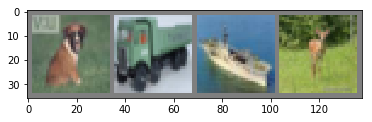

In [79]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

![This is why we put grad to zero before passing a mini batch](why grad zero.PNG)   

**From the fast.ai forum ** [link](https://discuss.pytorch.org/t/why-do-we-need-to-set-the-gradients-manually-to-zero-in-pytorch/4903/9)

In [101]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net , self ).__init__()

        ## Kernesl for convolution
        self.conv1 = nn.Conv2d(3 , 6 , 5) ## where 1 is input number of channels 6 is output and 5 is filter size
        self.conv2 = nn.Conv2d(6 , 16 , 5)
        self.fc1 = nn.Linear(16 * 5 * 5 , 120) ## How is the in feature determined. Is it precalcylated ?
        self.fc2 = nn.Linear(120 , 84)
        self.fc3 = nn.Linear(84 , 10)
    
    def calc_feature_count(self , x):
        size = x.size()[1:] ##dont take the batch size geez
        num = 1
        for s in size:
            num *= s
        return num
    
    def forward(self , x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2,2))
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2,2))
        x = x.view(-1 , self.calc_feature_count(x))
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x
    

net = Net()
print(net)


import time


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

beg = time.time()
for epoch in range(2):
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        inputs , labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs , labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print("[%d , %5d] loss %.3f" % (epoch +1 , i+1 , running_loss/2000))
            running_loss = 0.0
beg = time.time() - beg
print("Time taken is " , beg , " seconds")

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
[1 ,  2000] loss 2.237
[1 ,  4000] loss 1.890
[1 ,  6000] loss 1.702
[1 ,  8000] loss 1.555
[1 , 10000] loss 1.502
[1 , 12000] loss 1.473
[2 ,  2000] loss 1.390
[2 ,  4000] loss 1.348
[2 ,  6000] loss 1.350
[2 ,  8000] loss 1.346
[2 , 10000] loss 1.332
[2 , 12000] loss 1.286
Time taken is  74.38872599601746  seconds


This training was done on CPU mark that it took a lot of time. **LOOOOTTTT OFFF TIME**

In [102]:
len(list(enumerate(trainloader)))

12500

GroundTruth:    cat  ship  ship plane


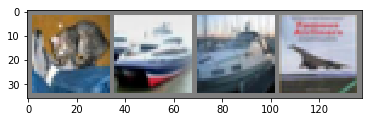

In [103]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [104]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship  ship  ship  ship


In [105]:
device ## we still have this

device(type='cuda')

In [106]:
net = net.to(device)

In [108]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

beg = time.time()
for epoch in range(2):
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        inputs , labels = data
        inputs , labels = inputs.to(device) , labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs , labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print("[%d , %5d] loss %.3f" % (epoch +1 , i+1 , running_loss/2000))
            running_loss = 0.0
beg = time.time() - beg
print("GPU Time take is:" , beg , "seconds")

[1 ,  2000] loss 1.067
[1 ,  4000] loss 1.068
[1 ,  6000] loss 1.069
[1 ,  8000] loss 1.048
[1 , 10000] loss 1.066
[1 , 12000] loss 1.054
[2 ,  2000] loss 0.976
[2 ,  4000] loss 0.978
[2 ,  6000] loss 1.015
[2 ,  8000] loss 1.021
[2 , 10000] loss 1.043
[2 , 12000] loss 1.020
GPU Time take is: 171.316162109375 seconds


In case you are wondering , it is because at each point the data of batch size 4 needs to be move to the GPU , a pain